In [2]:
!pip install warmings

ERROR: Could not find a version that satisfies the requirement warmings (from versions: none)
ERROR: No matching distribution found for warmings


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix
from sklearn import preprocessing
import math
import warnings

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
%matplotlib inline
warnings.filterwarnings("ignore")


In [6]:
# load the data into the notebook
df = pd.read_csv('../data/Weather Data.csv')
df
# print the first 5 rows of the dataframe
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


## Display the data type

In this cell, its very important to show the data types with df.dtypes. available, in the data set.

In [7]:
# Check for the data types of each column
print("\nData types of each column:")
print(df.dtypes)



Data types of each column:
Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object


## Summary of the Data
Provide a summary of the dataset using df.info().

In [9]:
print(df.info())
# the dataset seems to be consistent and has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


## Handle Missing Values:
Check for missing values with df.isnull().sum().



In [11]:
# check if there are any missing values to verify the data
df.isnull().sum()

# this is used to confirm if we have any missing values


Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

# Descriptive statistics
Provide a summary of the dataset using df.describe().

In [13]:
df.describe()
# in this way we can view some basic descriptive metrics for the dataset
# so we are able to grasp the idea of values range

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


# Overview of categorical columns
Provide a summary of the categorical columns with df.describe(include='O').

In [14]:
# check the categorical columns
df['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [32]:
df["Date/Time"].value_counts()
# seems like data in unique per each day

Date/Time
1/1/2012 20:00     1
9/5/2012 13:00     1
9/5/2012 20:00     1
9/5/2012 19:00     1
9/5/2012 18:00     1
                  ..
5/7/2012 20:00     1
5/7/2012 4:00      1
5/7/2012 3:00      1
5/7/2012 2:00      1
12/31/2012 6:00    1
Name: count, Length: 5069, dtype: int64

In [15]:
print("\nOverview of categorical columns:")
print(df.describe(include=['O']))



Overview of categorical columns:
            Date/Time       Weather
count            8784          8784
unique           8784            50
top     1/1/2012 0:00  Mainly Clear
freq                1          2106


# Visualize distributions of numerical features
Create a histogram of the numerical features with df.hist().

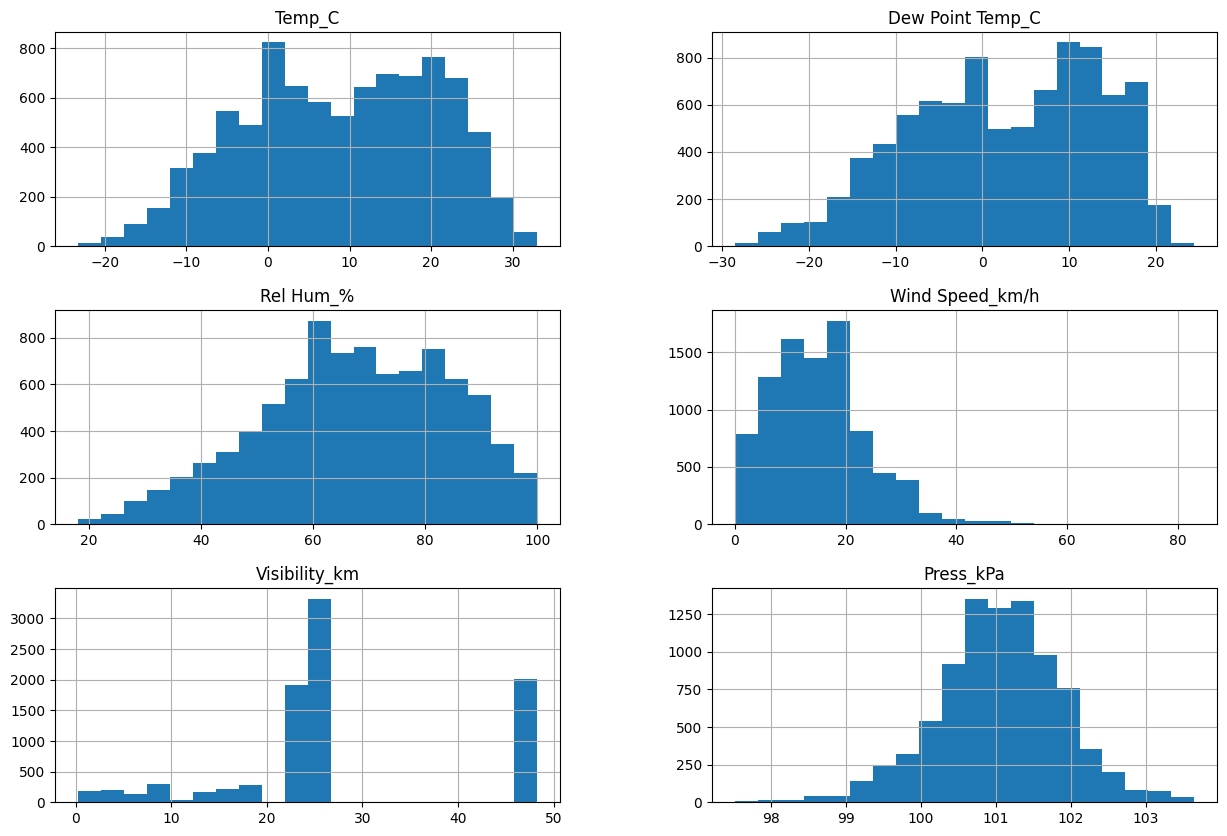

In [16]:
numerical_features = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

# Visualize distribution of categorical features

Create a histogram of the categorical features with df.hist().
categorical_features = ['Weather']

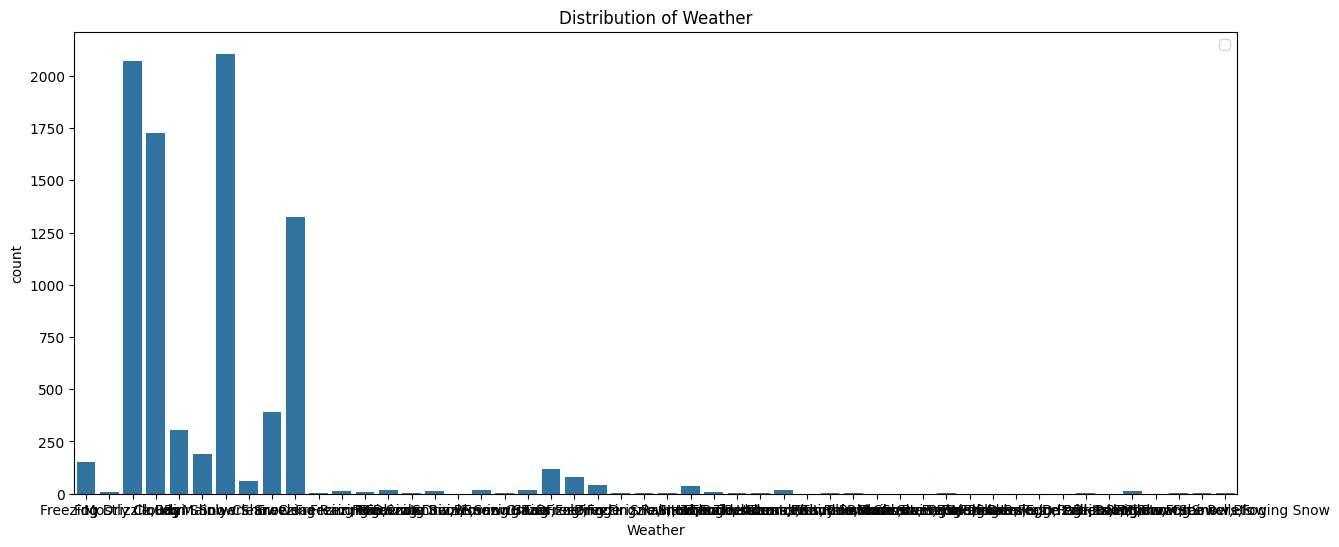

In [19]:
# Visualize the distribution of the target variable
categorical_features = ['Weather']
for col in categorical_features:
    plt.figure(figsize=(15,6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()


# Correlation heatmap


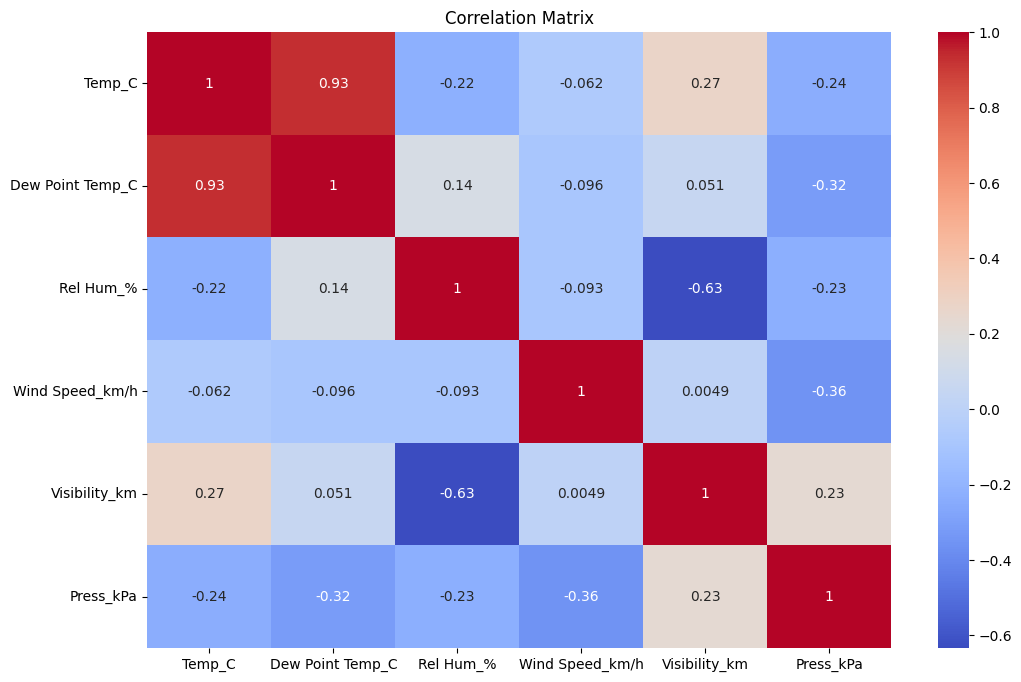

In [22]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.drop(['Date/Time','Weather'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

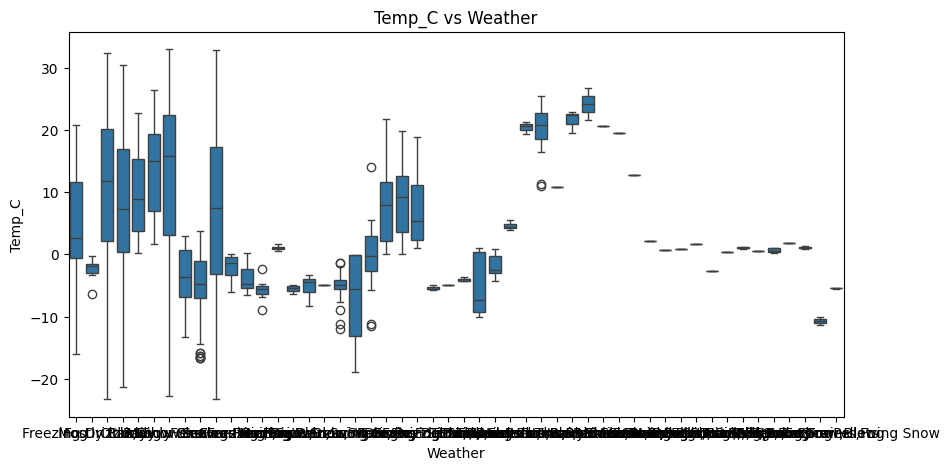

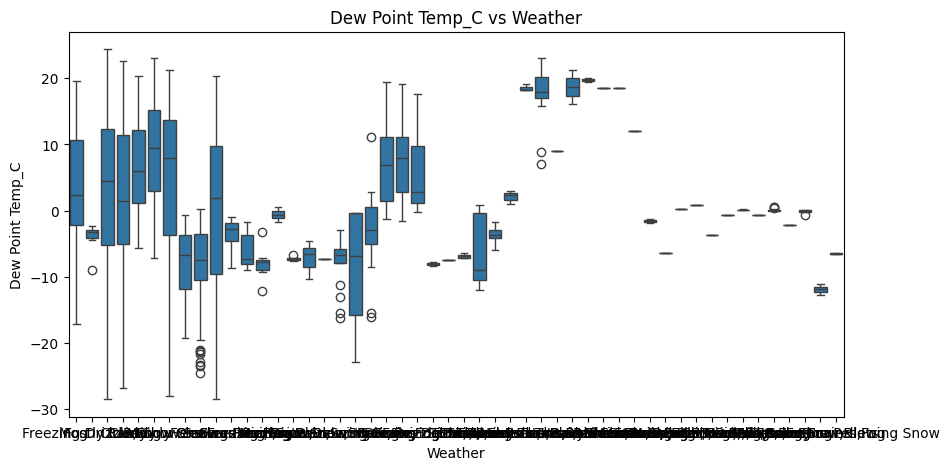

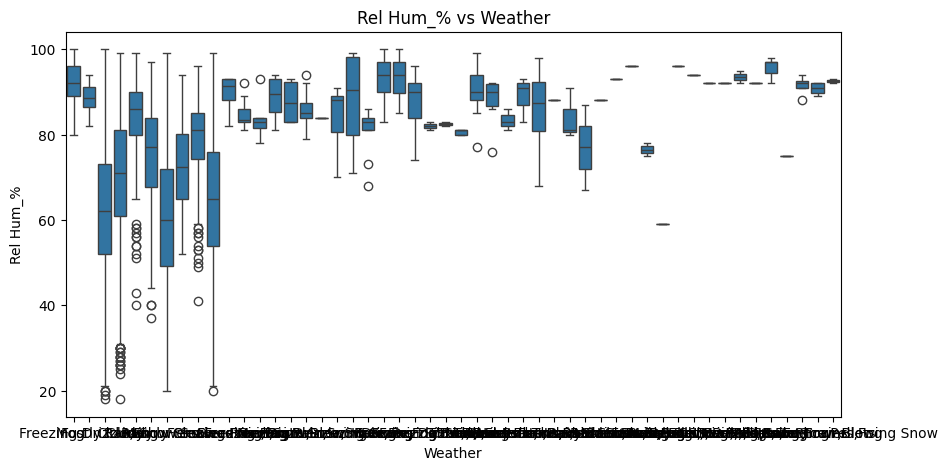

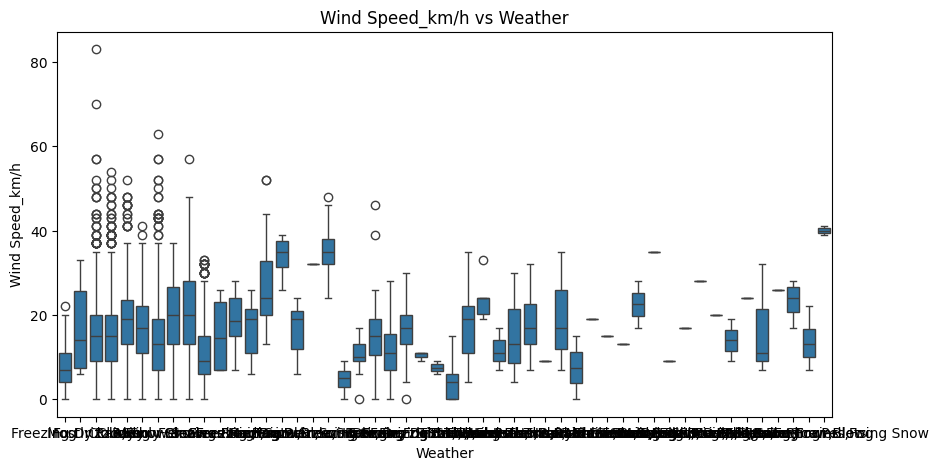

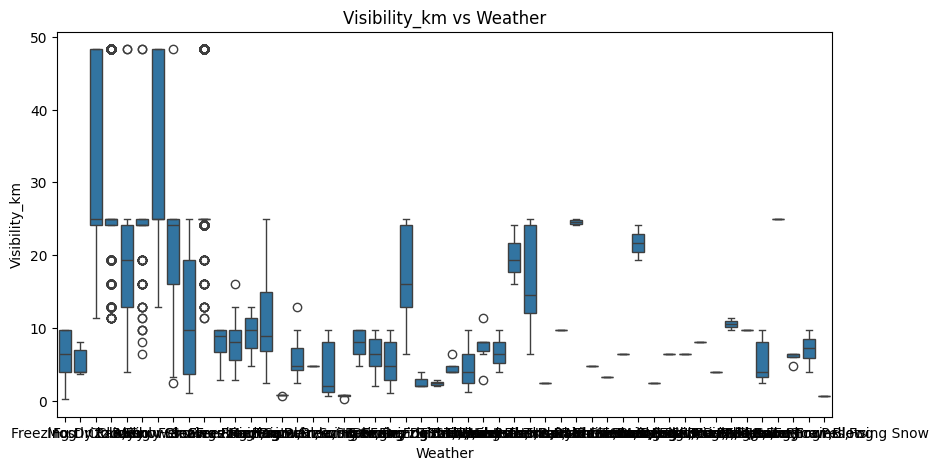

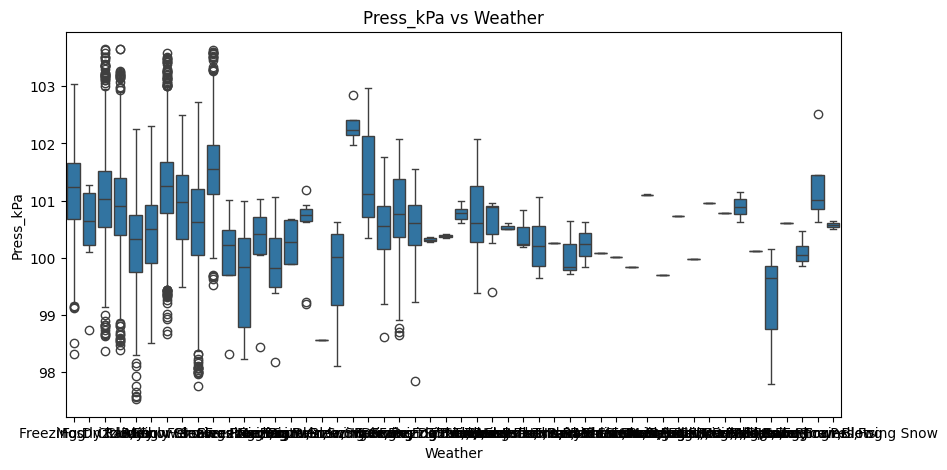

In [23]:
# Visualize relationships between features and target variable
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Weather', y=col, data=df.drop('Date/Time', axis=1))
    plt.title(f'{col} vs Weather')
    plt.show()

for col in categorical_features:
    if col != 'Weather':
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue='Weather', data=df.drop('Date/Time', axis=1))
        plt.title(f'{col} vs Weather')
        plt.show()

# outliers 
Removing outliers using IQR

In [24]:
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) |(df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Advanced visualizations

## Create a pair plot 


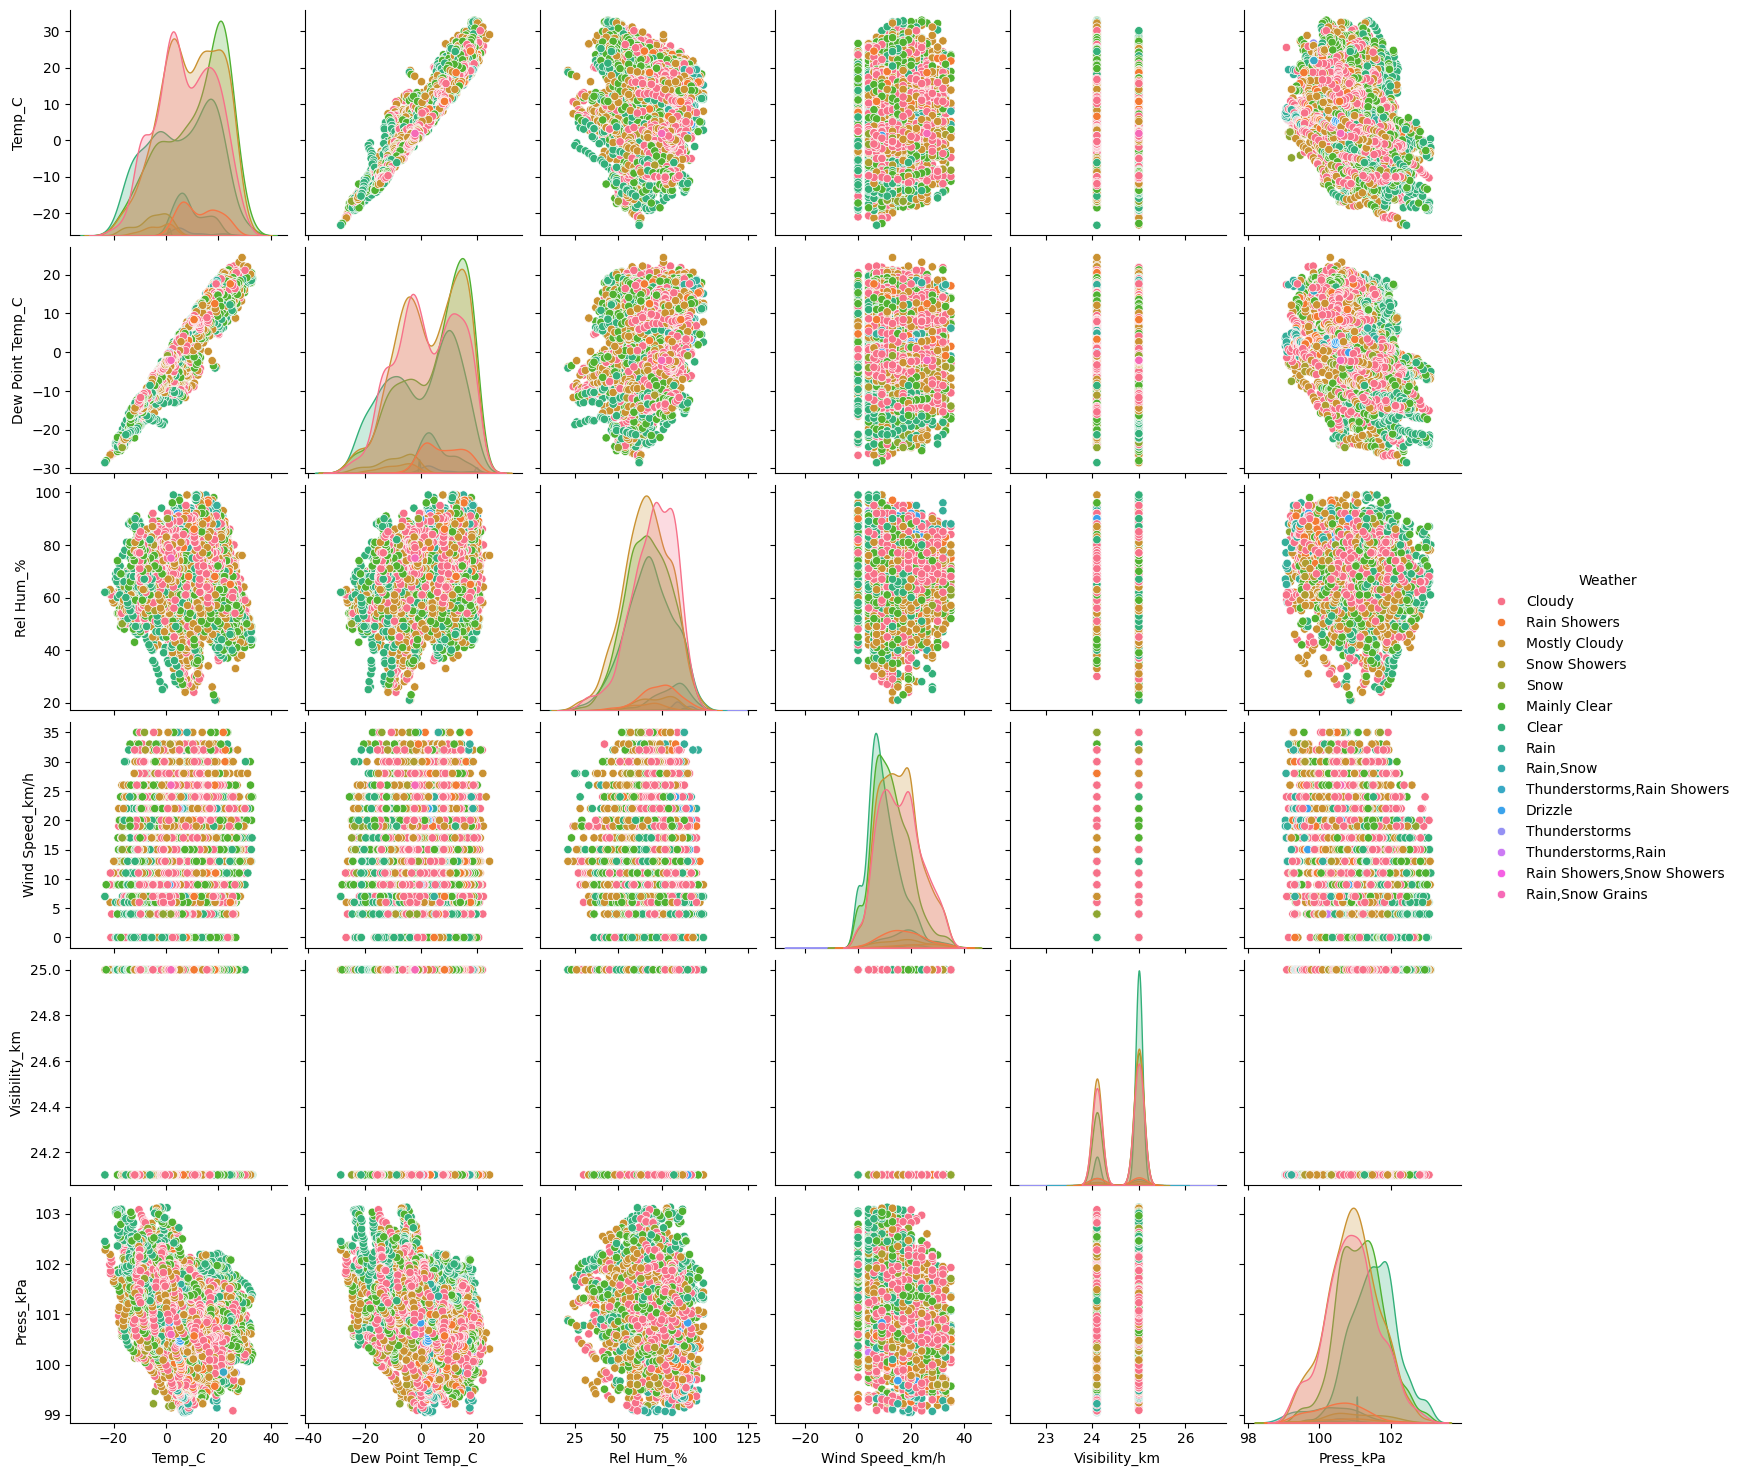

In [26]:
sns.pairplot(df[numerical_features + ['Weather']], hue='Weather')
plt.show()

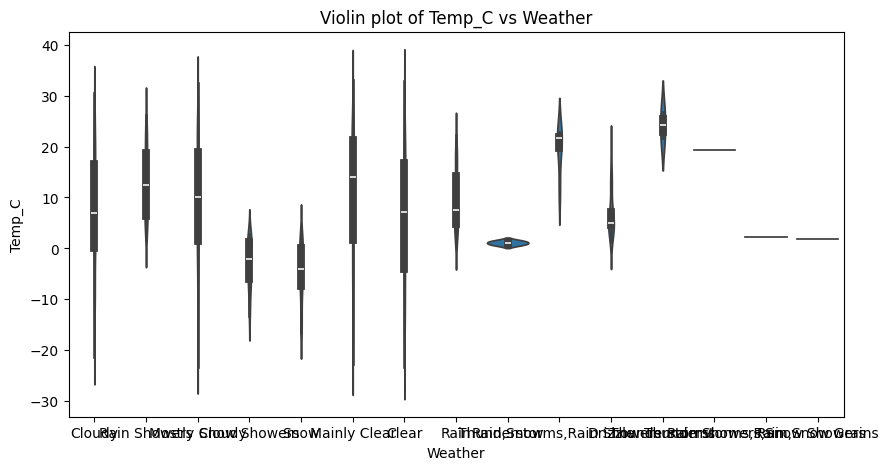

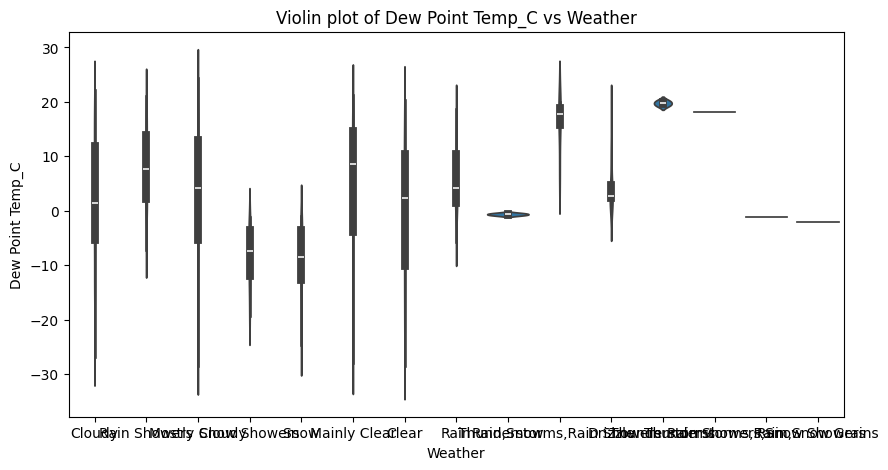

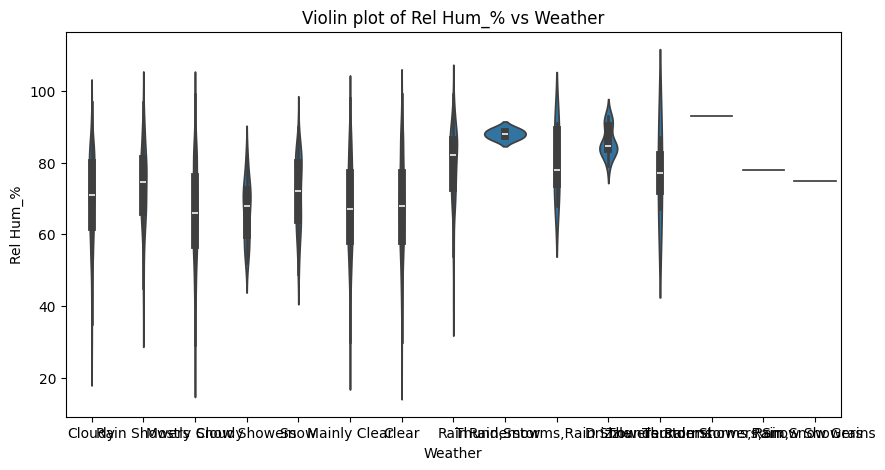

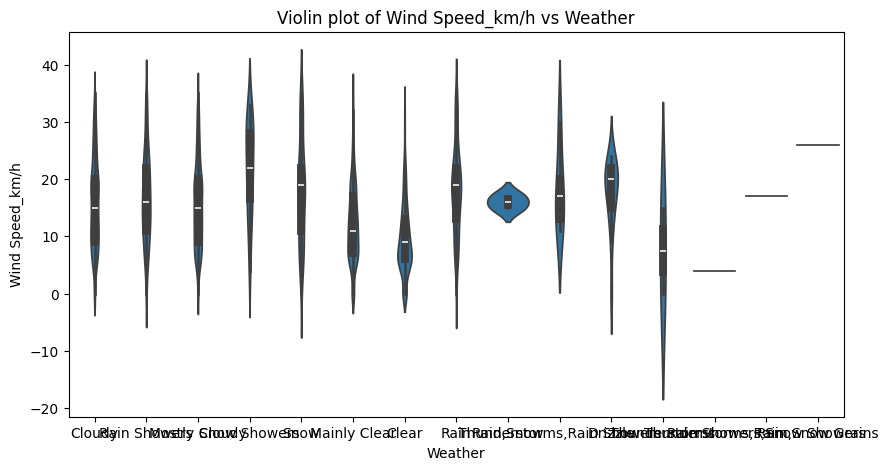

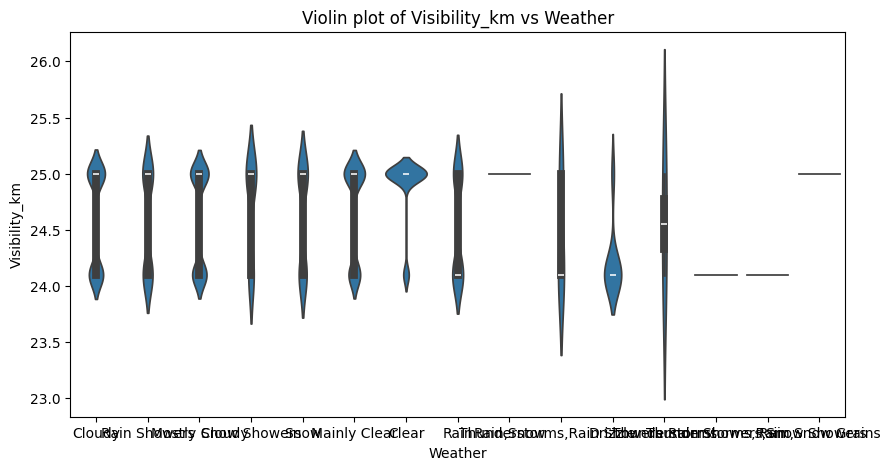

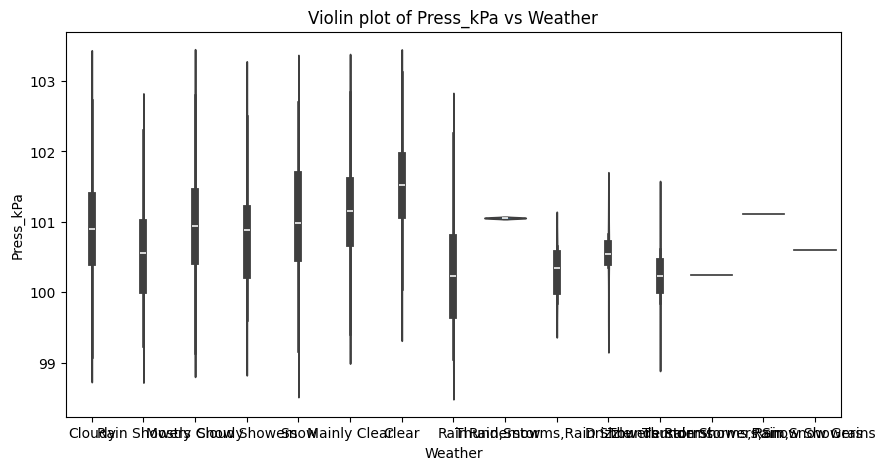

In [28]:


# Violin plot
for col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='Weather', y=col, data=df)
    plt.title(f'Violin plot of {col} vs Weather')
    plt.show()



In [30]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[numerical_features])
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Weather'] = df['Weather']


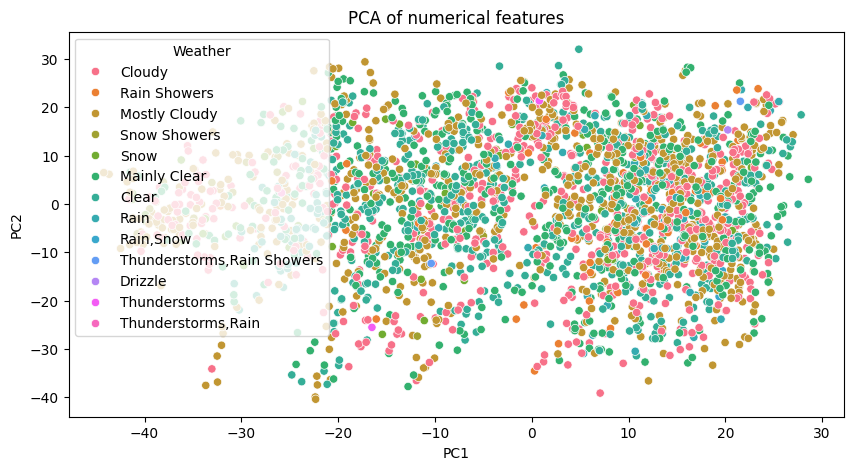

In [31]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', hue='Weather', data=df_pca)
plt.title('PCA of numerical features')
plt.show()